<a href="https://colab.research.google.com/github/HoseinNekouei/PyTorch_Binary-Prediction-of-Poisonous-Mushrooms/blob/main/Torch_binary_prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!mkdir /content/data

mkdir: cannot create directory ‘/content/data’: File exists


In [14]:
!cp /content/drive/MyDrive/dataset/playground-series-s4e8_2.zip /content/data

In [15]:
!unzip /content/data/playground-series-s4e8_2.zip -d /content/data

Archive:  /content/data/playground-series-s4e8_2.zip
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [6]:
# !rm /content/test.csv
# !rm /content/train.csv
# !rm /content/sample_submission.csv

# **Import Library**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import matthews_corrcoef
import joblib  # For saving and loading the encoder

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# **Step1: Data**




## **Preprocessing**

### *Load Train set*




In [19]:
train_df= pd.read_csv('/content/data/train.csv')
train_df= train_df.drop(columns=['id'])
train_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [20]:
test_df= pd.read_csv('/content/data/test.csv')
test_df= test_df.drop(columns=['id'])
test_df.insert(0, 'class', 'z')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 332.9+ MB


In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 332.9+ MB


### *NaN*

In [22]:
train_df.isna().mean()

,0
class,0.000000
cap-diameter,0.000001
cap-shape,0.000013
cap-surface,0.215282
cap-color,0.000004
does-bruise-or-bleed,0.000003
gill-attachment,0.168093
gill-spacing,0.403740
gill-color,0.000018
stem-height,0.000000


In [23]:
test_df.isna().mean()

,0
class,0.000000e+00
cap-diameter,3.368682e-06
cap-shape,1.491845e-05
cap-surface,2.150682e-01
cap-color,6.256124e-06
does-bruise-or-bleed,4.812403e-06
gill-attachment,1.683480e-01
gill-spacing,4.040469e-01
gill-color,2.358077e-05
stem-height,4.812403e-07


In [24]:
missing_threshold= 0.85

high_missing_train_columns= train_df.columns[train_df.isna().mean() > missing_threshold]
high_missing_train_columns

train_df= train_df.drop(columns= high_missing_train_columns)
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


In [25]:
high_missing_test_columns= test_df.columns[test_df.isna().mean() > missing_threshold]
print(high_missing_test_columns)

test_df= test_df.drop(columns= high_missing_test_columns)
test_df.head()

Index(['stem-root', 'veil-type', 'veil-color', 'spore-print-color'], dtype='object')


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,z,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,NaN,w,t,g,d,a
1,z,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,n,f,f,d,a
2,z,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,n,f,f,d,s
3,z,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,w,t,z,d,u
4,z,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,y,t,NaN,d,u


In [26]:
train_mode_values= train_df.mode()
train_mode_values= train_mode_values.loc[0].to_dict()
train_mode_values

{'class': 'p',
 'cap-diameter': 1.49,
 'cap-shape': 'x',
 'cap-surface': 't',
 'cap-color': 'n',
 'does-bruise-or-bleed': 'f',
 'gill-attachment': 'a',
 'gill-spacing': 'c',
 'gill-color': 'w',
 'stem-height': 5.24,
 'stem-width': 2.41,
 'stem-surface': 's',
 'stem-color': 'w',
 'has-ring': 'f',
 'ring-type': 'f',
 'habitat': 'd',
 'season': 'a'}

In [27]:
test_mode_values= test_df.mode()
test_mode_values= test_mode_values.loc[0].to_dict()
test_mode_values

{'class': 'z',
 'cap-diameter': 1.49,
 'cap-shape': 'x',
 'cap-surface': 't',
 'cap-color': 'n',
 'does-bruise-or-bleed': 'f',
 'gill-attachment': 'a',
 'gill-spacing': 'c',
 'gill-color': 'w',
 'stem-height': 5.24,
 'stem-width': 2.41,
 'stem-surface': 's',
 'stem-color': 'w',
 'has-ring': 'f',
 'ring-type': 'f',
 'habitat': 'd',
 'season': 'a'}

In [28]:
train_median_values= train_df.median(numeric_only= True).to_dict()
train_median_values

{'cap-diameter': 5.75, 'stem-height': 5.88, 'stem-width': 9.65}

In [29]:
test_median_values= test_df.median(numeric_only= True).to_dict()
test_median_values

{'cap-diameter': 5.74, 'stem-height': 5.88, 'stem-width': 9.64}

In [30]:
for column in train_df:
  if train_df[column].isna().any():
    if train_df[column].dtype== 'object':
      train_df[column]= train_df[column].fillna(train_mode_values[column])
    else:
      train_df[column]= train_df[column].fillna(train_median_values[column])

train_df.isna().median()

,0
class,0.0
cap-diameter,0.0
cap-shape,0.0
cap-surface,0.0
cap-color,0.0
does-bruise-or-bleed,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-color,0.0
stem-height,0.0


In [31]:
for column in test_df:
  if test_df[column].isna().any():
    if test_df[column].dtype== 'object':
      test_df[column]= test_df[column].fillna(test_mode_values[column])
    else:
      test_df[column]= test_df[column].fillna(test_median_values[column])

test_df.isna().median()

,0
class,0.0
cap-diameter,0.0
cap-shape,0.0
cap-surface,0.0
cap-color,0.0
does-bruise-or-bleed,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-color,0.0
stem-height,0.0


### *Split Dataframe to train and validation*

In [32]:
num_samples, num_features= train_df.shape
num_features-= 1
num_classes= len(train_df['class'].unique())
print(f'num_sample: {num_samples}, num_features: {num_features}, num_classes: {num_classes}')

num_sample: 3116945, num_features: 16, num_classes: 2


In [33]:
train_df, val_df= train_test_split(train_df, test_size=0.2, random_state=42, stratify= train_df['class'])
print(f'train_df: {train_df.shape}, val_df: {val_df.shape}')

train_df: (2493556, 17), val_df: (623389, 17)


### *Encoding*

In [34]:
ordinal_encoder= OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1)
cat_col_name= train_df.select_dtypes(include=['object']).columns

print(cat_col_name)

train_df[cat_col_name]= ordinal_encoder.fit_transform(train_df[cat_col_name].astype(str))
val_df[cat_col_name]= ordinal_encoder.transform(val_df[cat_col_name].astype(str))

print(train_df.head())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')
         class  cap-diameter  cap-shape  cap-surface  cap-color  \
586767     1.0          4.95       61.0         69.0       61.0   
2665706    1.0          1.47       39.0         74.0       59.0   
1270574    0.0         10.29       61.0         46.0       57.0   
2935630    1.0          7.45       57.0         40.0       59.0   
3113991    1.0          5.44       61.0         69.0       51.0   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
586767                    8.0             36.0          22.0        53.0   
2665706                   8.0             36.0          22.0        37.0   
1270574                   8.0             64.0          22.0        53.0   
2935630                  19.0             3

In [35]:
test_df[cat_col_name]= ordinal_encoder.transform(test_df[cat_col_name].astype(str))
test_df[cat_col_name]

print(train_df.head())

         class  cap-diameter  cap-shape  cap-surface  cap-color  \
586767     1.0          4.95       61.0         69.0       61.0   
2665706    1.0          1.47       39.0         74.0       59.0   
1270574    0.0         10.29       61.0         46.0       57.0   
2935630    1.0          7.45       57.0         40.0       59.0   
3113991    1.0          5.44       61.0         69.0       51.0   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
586767                    8.0             36.0          22.0        53.0   
2665706                   8.0             36.0          22.0        37.0   
1270574                   8.0             64.0          22.0        53.0   
2935630                  19.0             39.0          22.0        40.0   
3113991                   8.0             36.0          22.0        43.0   

         stem-height  stem-width  stem-surface  stem-color  has-ring  \
586767          3.80       12.36          43.0        47.0       4.0

In [36]:
# # Delete unused variable
# del train_df

# # Force  garbage collection
# import gc
# gc.collect()

In [37]:
# Check current RAM usage
import psutil
ram_usage = psutil.virtual_memory()
print(f"Used RAM: {ram_usage.used / (1024 ** 3):.2f} GB")
print(f"Available RAM: {ram_usage.available / (1024 ** 3):.2f} GB")

Used RAM: 3.61 GB
Available RAM: 8.75 GB


### *Normalization*

In [38]:
# scaler= StandardScaler()
# num_features_list= list(train_median_values.keys())
# num_features_list

# train_df[num_features_list]= scaler.fit_transform(train_df[num_features_list])
# val_df[num_features_list]= scaler.transform(val_df[num_features_list])

# test_df[num_features_list]= scaler.transform(test_df[num_features_list])
# train_df.head(2)
# test_df.head(2)

### *HiTorch*

In [39]:
X_train = train_df.drop(columns=['class'], axis=1).values
y_train= train_df['class'].values.reshape(-1,1)

X_val= val_df.drop(columns=['class'], axis=1).values
y_val= val_df['class'].values.reshape(-1, 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2493556, 16), (2493556, 1), (623389, 16), (623389, 1))

In [40]:
X_train= torch.tensor(X_train, dtype= torch.float32)
y_train= torch.tensor(y_train, dtype= torch.float32)

X_val= torch.tensor(X_val, dtype= torch.float32)
y_val= torch.tensor(y_val, dtype= torch.float32)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_train[1]

(torch.Size([2493556, 16]),
 torch.Size([2493556, 1]),
 torch.Size([623389, 16]),
 torch.Size([623389, 1]),
 tensor([ 1.4700, 39.0000, 74.0000, 59.0000,  8.0000, 36.0000, 22.0000, 37.0000,
          5.2300,  3.0900, 43.0000, 45.0000,  4.0000, 14.0000, 20.0000,  2.0000]))

In [41]:
X_test= test_df.drop(columns=['class'],axis=1).values
y_test= test_df['class'].values.reshape(-1, 1)

X_test.shape, y_test.shape

((2077964, 16), (2077964, 1))

In [42]:
X_test= torch.tensor(X_test, dtype= torch.float32)
y_test= torch.tensor(y_test, dtype= torch.float32)

In [43]:
train_set= TensorDataset(X_train, y_train)
val_set= TensorDataset(X_val, y_val)
test_set= TensorDataset(X_test, y_test)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([2493556, 16]),
 torch.Size([2493556, 1]),
 torch.Size([623389, 16]),
 torch.Size([623389, 1]),
 torch.Size([2077964, 16]),
 torch.Size([2077964, 1]))

In [44]:
train_loader= DataLoader(train_set, batch_size=128, shuffle= True)
val_loader= DataLoader(val_set, batch_size= 128)
test_loader= DataLoader(test_set, batch_size= 128)

# **Step2: Model**

In [74]:
nf_hidden_layer1= 32 * num_features
nf_hidden_layer2= 16 * num_features
nf_hidden_layer3= 4 * num_features

model = nn.Sequential(
    nn.Linear(in_features= num_features, out_features= nf_hidden_layer1),
    nn.ReLU(),
    nn.Linear(in_features= nf_hidden_layer1, out_features= nf_hidden_layer2),
    nn.ReLU(),
    nn.Linear(in_features= nf_hidden_layer2, out_features= nf_hidden_layer3),
    nn.ReLU(),
    nn.Linear(in_features= nf_hidden_layer3, out_features= num_features),
    nn.ReLU(),
    nn.Linear(num_features, num_classes-1),
    nn.Sigmoid()
)

model.to(device)

Sequential(
  (0): Linear(in_features=16, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=1, bias=True)
  (9): Sigmoid()
)

# **Step3: Loss function**

In [75]:
loss_fn= nn.BCELoss()
loss_fn

BCELoss()

# **Step4: Optimizer**

In [76]:
opt= torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
opt= torch.optim.Adam(model.parameters(), lr=0.0001)
opt

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)

# **Step5: Train loop**

In [48]:
def matthews_correlation_coefficient(y_true, y_pred):
    """
    Calculate Matthews Correlation Coefficient (MCC) on GPU using PyTorch.

    Args:
        y_true (torch.Tensor): Ground truth labels (binary, 0 or 1).
        y_pred (torch.Tensor): Predicted labels (binary, 0 or 1).

    Returns:
        mcc (torch.Tensor): MCC value.
    """

    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum().float()
    TN = ((y_true == 0) & (y_pred == 0)).sum().float()
    FP = ((y_true == 0) & (y_pred == 1)).sum().float()
    FN = ((y_true == 1) & (y_pred == 0)).sum().float()

    # Calculate numerator and denominator
    numerator = (TP * TN) - (FP * FN)
    denominator = torch.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Handle division by zero
    if denominator == 0:
        return torch.tensor(0.0, device=y_true.device)
    else:
        return numerator / denominator

In [77]:
best_loss_val = 10000
loss_train_hist, loss_val_hist =[], []
acc_train_hist, acc_val_hist= [], []

In [79]:
epochs= 2

for epoch in range(epochs):
  mean_loss_train, mean_acc_train, train_mcc= 0, 0, 0
  mean_loss_val, mean_acc_val, val_mcc= 0, 0, 0

  for x_batch, y_batch in train_loader:

    #GPU
    x_batch = x_batch.to(device)
    y_batch= y_batch.to(device)

    #model
    y_hat= model(x_batch)

    #loss
    loss= loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    opt.step()
    opt.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()
    # train_mcc += matthews_correlation_coefficient(y_batch, y_hat.round())

  mean_loss_train /= len(train_set)
  mean_acc_train /= len(train_set)
  # train_mcc /= len(train_set)
  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in val_loader:

      #GPU
      x_batch = x_batch.to(device)
      y_batch= y_batch.to(device)

      y_hat= model(x_batch)

      loss= loss_fn(y_hat, y_batch)

      mean_loss_val += loss.item() * len(x_batch)
      mean_acc_val += torch.sum(y_hat.round() == y_batch).item()
      # val_mcc += matthews_correlation_coefficient(y_batch, y_hat.round())
      # print(f'Matthews Correlation Coefficient: {val_mcc:.3f}')

    mean_loss_val /= len(val_set)
    mean_acc_val /= len(val_set)
    # val_mcc /= len(val_set)
    loss_val_hist.append(mean_loss_val)
    acc_val_hist.append(mean_acc_val)

  print(f'epoch[{epoch}]: '
      f'Train_loss: {mean_loss_train:.3f} ,'
      f'Train_acc: {mean_acc_train:.3f} ,'
      # f'mcc: {train_mcc:.3f} '
      f'val_loss: {mean_loss_val:.3f} ,'
      f'val_acc: {mean_acc_val:.3f} '
      # f'mcc: {val_mcc:.3f}'
      )

  if mean_loss_val < best_loss_val:
    best_loss_val = mean_loss_val
    print('model saved!')
    print()
    torch.save(model,'/content/drive/MyDrive/Projects/best_model.pt')

epoch[0]: Train_loss: 0.049 ,Train_acc: 0.988 ,val_loss: 0.049 ,val_acc: 0.988 
model saved!

epoch[1]: Train_loss: 0.048 ,Train_acc: 0.988 ,val_loss: 0.049 ,val_acc: 0.988 
model saved!



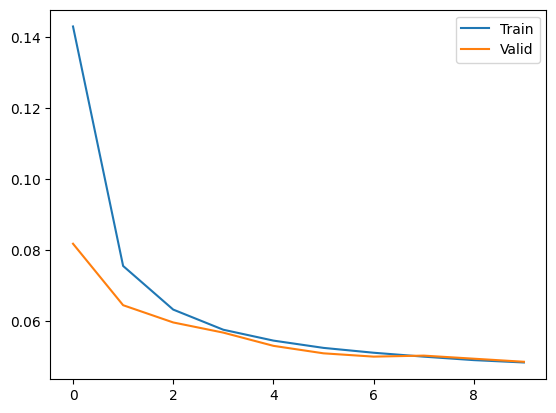

In [80]:
plt.plot(torch.arange(len(loss_train_hist)), loss_train_hist)
plt.plot(torch.arange(len(loss_val_hist)), loss_val_hist)

plt.legend(["Train", "Valid"]);

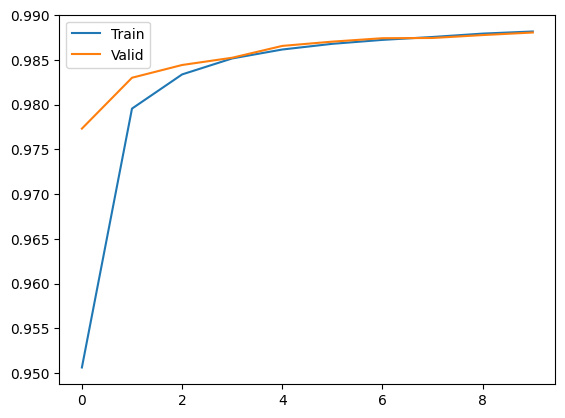

In [81]:
plt.plot(torch.arange(len(acc_train_hist)), acc_train_hist)
plt.plot(torch.arange(len(acc_val_hist)), acc_val_hist)
plt.legend(["Train", "Valid"]);

In [82]:
model = torch.load("/content/drive/MyDrive/Projects/best_model.pt")

In [ ]:
predictions = []

with torch.no_grad():
  for x_batch, _ in test_loader:
    x_batch= x_batch.to(device)
    y_hat = model(x_batch)
    predictions.extend(y_hat.round().cpu().numpy())


# Generate IDs starting from 3116945
start_id = 3116945
ids = list(range(start_id, start_id + len(predictions)))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame({
    'ID': ids,  # Add ID column
    'Prediction': predictions  # Add prediction column
})


In [ ]:
import ast

In [ ]:
predictions_df.info()

In [ ]:
# predictions_df['Prediction'] = predictions_df['Prediction'].apply(lambda x: int(ast.literal_eval(x)[0]))
predictions_df['Prediction'] = predictions_df['Prediction'].apply(lambda x: int(x))
predictions_df

In [ ]:
label_map= {0: 'e', 1: 'p'}

predictions_df['Prediction']= predictions_df['Prediction'].apply(lambda x: label_map[x])
predictions_df

In [ ]:
predictions_df= predictions_df.rename(columns= {'ID': 'id', 'Prediction': 'class'})
predictions_df

In [ ]:
# Save to Excel
predictions_df.to_csv('/content/drive/MyDrive/dataset/playground-series-s4e8_v2.csv', index=False)

print("Predictions with IDs saved to 'playground-series-s4e8_v2.csv'")